In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import random

In [9]:
#thêm biên kích thước ngẫu nhiên
def add_boder(image_path,output_path,low, high):
    """
    low: kích thước biên thấp nhất (pixel)
    hight: kích thước biên lớn nhất (pixel)
    """
    # random các kích thước biên trong khoảng (low, high)
    top=random.randint(low,high)
    bottom=random.randint(low,high)
    left=random.randint(low,high)
    right=random.randint(low,high)
    
    image=cv2.imread(image_path)
    original_width,original_height=image.shape[1],image.shape[0]
    
    #sử dụng hàm của opencv để thêm biên
    image=cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_REPLICATE)
    
    #sau đó resize ảnh bằng kích thước ban đầu của ảnh
    image=cv2.resize(image,(original_width,original_height))
    cv2.imwrite(output_path,image)

In [11]:
ori_image=cv2.imread('0000_00532_b.jpg')
ori_image=cv2.cvtColor(ori_image,cv2.COLOR_BGR2RGB)
add_boder('0000_00532_b.jpg','1.jpg',100,400)
fix_image=cv2.imread('1.jpg')
fix_image=cv2.cvtColor(fix_image,cv2.COLOR_BGR2RGB)

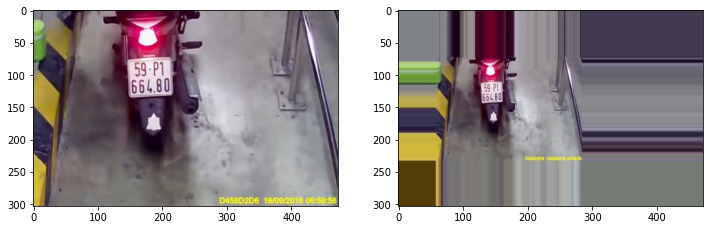

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.imshow(ori_image)
ax2.imshow(fix_image)

In [19]:
# Cách2
def random_crop(image_path,out_path):
    image = cv2.imread(image_path)
    
    original_width, original_height = image.shape[1], image.shape[0]
    x_center,y_center = original_height//2, original_width//2
    
    x_left = random.randint(0, x_center//2)
    x_right = random.randint(original_width-x_center//2, original_width)
    
    y_top = random.randint(0, y_center//2)
    y_bottom = random.randint(original_height-y_center//2, original_width)
    
    # crop ra vùng ảnh với kích thước ngẫu nhiên
    cropped_image = image[y_top:y_bottom, x_left:x_right]
    # resize ảnh bằng kích thước ảnh ban đầu 
    cropped_image = cv2.resize(cropped_image, (original_width, original_height))
    cv2.imwrite(out_path, cropped_image)
    

In [20]:
ori_image=cv2.imread('0000_00532_b.jpg')
ori_image=cv2.cvtColor(ori_image,cv2.COLOR_BGR2RGB)
random_crop('0000_00532_b.jpg','test1.jpg')
fix_image=cv2.imread('test1.jpg')
fix_image=cv2.cvtColor(fix_image,cv2.COLOR_BGR2RGB)

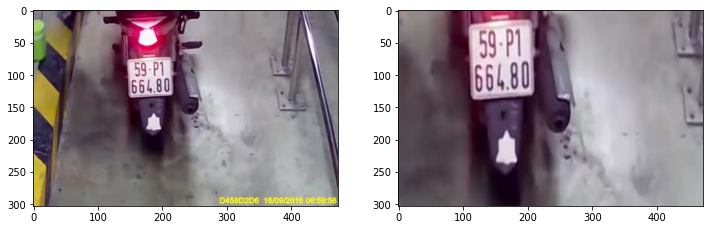

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.imshow(ori_image)
ax2.imshow(fix_image)

In [24]:
def change_brightness(image_path, output_path, value):
    """
    value: độ sáng thay đổi
    """
    img=cv2.imread(image_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    
    cv2.imwrite(output_path, img)

In [35]:
ori_image=cv2.imread('0000_00532_b.jpg')
ori_image=cv2.cvtColor(ori_image,cv2.COLOR_BGR2RGB)
value=random.randint(-50,50)
print(value)
change_brightness('0000_00532_b.jpg','test2.jpg',value)
fix_image=cv2.imread('test2.jpg')
fix_image=cv2.cvtColor(fix_image,cv2.COLOR_BGR2RGB)

44


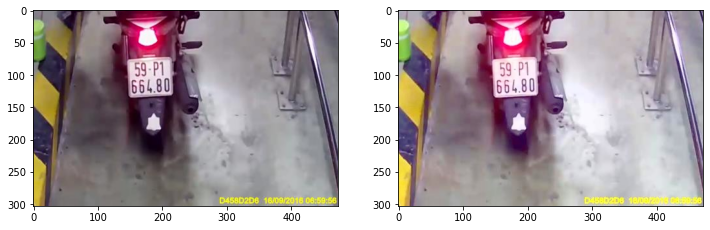

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.imshow(ori_image)
ax2.imshow(fix_image)

In [40]:
import imutils
def rotate_image(image_path,range_angle,output_path):
    """
    range_angle: Khoảng góc quay
    """
    image = cv2.imread(image_path)
    #lựa chọn ngẫu nhiên góc quay 
    angle = random.randint(-range_angle,range_angle)
    
    img_rot = imutils.rotate(image, angle)
    cv2.imwrite(output_path, img_rot)

In [41]:
ori_image=cv2.imread('0000_00532_b.jpg')
ori_image=cv2.cvtColor(ori_image,cv2.COLOR_BGR2RGB)
rotate_image('0000_00532_b.jpg',30,'test3.jpg')
fix_image=cv2.imread('test3.jpg')
fix_image=cv2.cvtColor(fix_image,cv2.COLOR_BGR2RGB)

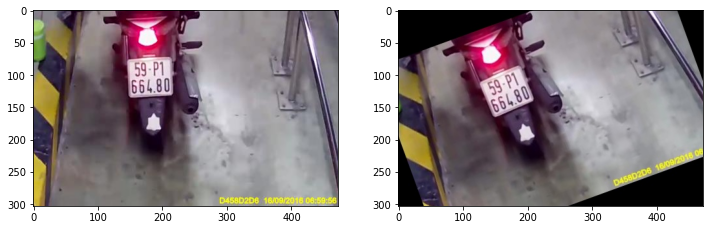

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.imshow(ori_image)
ax2.imshow(fix_image)